In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [261]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [262]:
X = df['Attendance'].values
Y = df['CapstoneScore'].values
X

array([79.9, 76.8, 96.6, 83.2, 86.5, 76.6, 83.8, 90. , 68.4, 95.9, 68.2,
       67.6, 61.5, 82.6, 78.1, 66.2, 94.5, 70.8, 66.2, 86.4, 68.9, 69.2,
       64.2, 92. , 86.1, 94.2, 75.9, 68.2, 95.9, 60.5, 83.3, 95.7, 92.7,
       70.4, 75.2, 83.6, 70.7, 71.8, 97.9, 79.5, 60.9, 70.7, 81.7, 85.3,
       70.3, 65.6, 93.4, 99.4, 70.9, 60.7, 64.7, 83.1, 71. , 65.5, 95. ,
       83.9, 67. , 96.6, 76.8, 63.3, 69.8, 75.6, 71.5, 82.7, 79. , 86.5,
       97.5, 89.3, 68.6, 79.9, 83.9, 90.8])

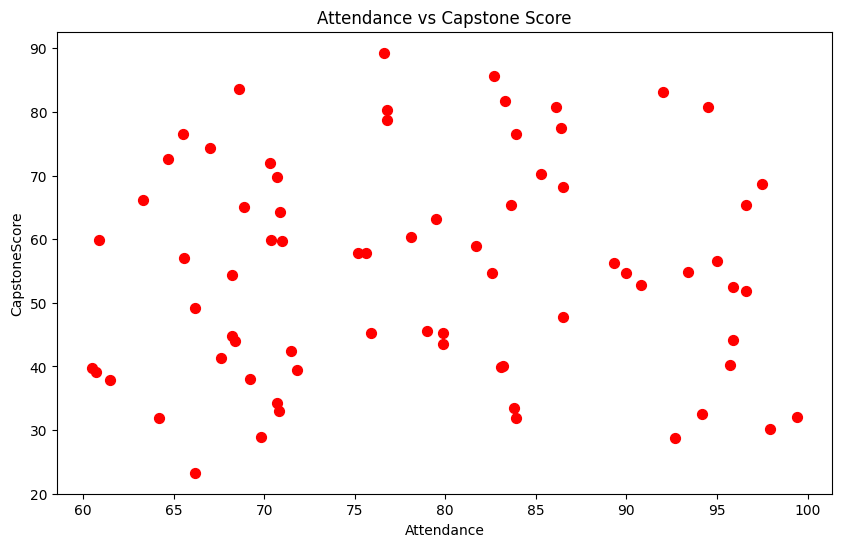

In [263]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='red',s=50)
plt.xlabel('Attendance')
plt.ylabel('CapstoneScore')
plt.title('Attendance vs Capstone Score')
plt.show()

In [264]:
degree = 3

In [265]:
n = len(X)

X_scaled = (X - X.mean()) / X.std()

# Polynomial features
X_poly = np.ones((n, degree + 1))
for i in range(1, degree + 1):
    X_poly[:, i] = X_scaled**i


In [266]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

In [267]:
cost_history=[]
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


In [268]:
X_with_bias = X_poly
beta = np.random.randn(degree + 1)
n_iter = 10000
lr = 0.01

In [269]:
beta = gradient_descent(X_with_bias,Y,beta,n_iter,lr)

iteration: 0, beta:[-0.54611537  0.57391649  0.86928514  1.87087874], cost:1639.6922680810571
iteration: 100, beta:[26.74205102 -1.07451709 14.80925612 -0.70876746], cost:375.2327591165745
iteration: 200, beta:[36.73459216 -0.2390419  10.97889361 -1.12865746], cost:256.4147407714502
iteration: 300, beta:[43.08684656  0.68713639  6.92780474 -1.14971123], cost:198.37627331045903
iteration: 400, beta:[47.61760502  1.43380583  3.86814056 -1.15797428], cost:167.72099100862957
iteration: 500, beta:[50.90216015  2.02092185  1.63706012 -1.18132564], cost:151.49970349901926
iteration: 600, beta:[ 5.32882860e+01  2.48451564e+00  1.79681021e-02 -1.21564189e+00], cost:142.91040670136863
iteration: 700, beta:[55.02212246  2.85342684 -1.1557848  -1.25591526], cost:138.3580704127392
iteration: 800, beta:[56.28194954  3.14940497 -2.00614937 -1.2985738 ], cost:135.9421148519797
iteration: 900, beta:[57.19728986  3.38880128 -2.62180008 -1.34125251], cost:134.65751663943502
iteration: 1000, beta:[57.8622

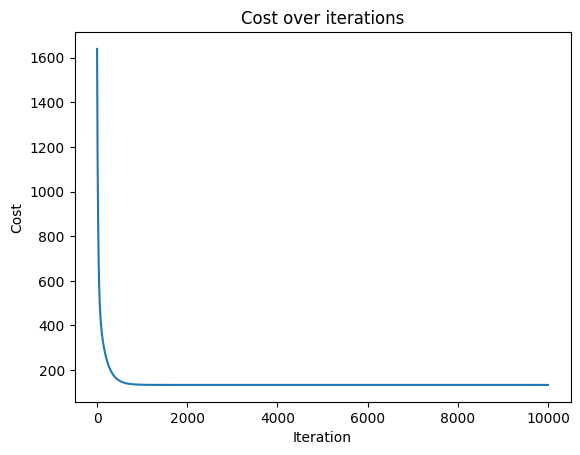

In [270]:

plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost over iterations')
plt.show()

In [271]:
def predict(X,beta,degree):
    n = len(X)

    X_scaled = (X - X.mean()) / X.std()

    # Polynomial features
    X_poly = np.ones((n, degree + 1))
    for i in range(1, degree + 1):
        X_poly[:, i] = X_scaled**i
    return X_poly.dot(beta)

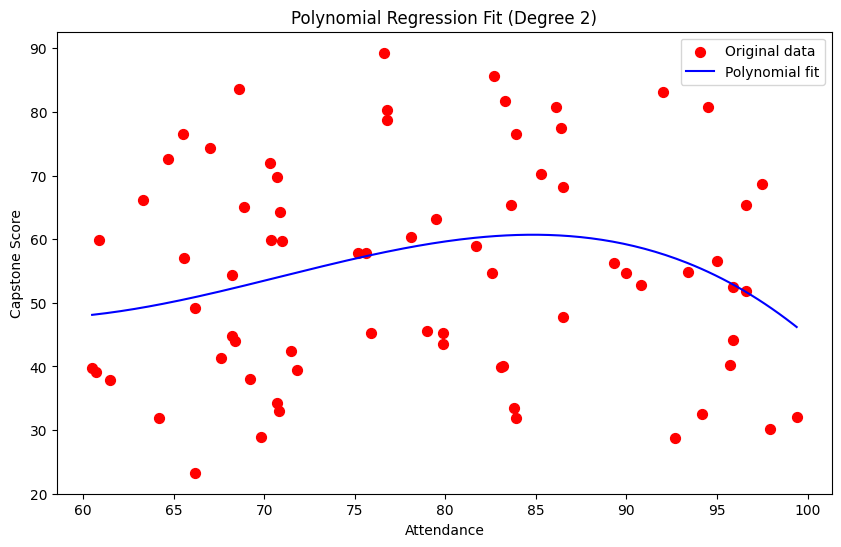

In [272]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='red', s=50, label='Original data')

X_line = np.linspace(min(X), max(X), 200)
Y_line = predict(X_line, beta, degree)

plt.plot(X_line, Y_line, color='blue', label='Polynomial fit')
plt.xlabel('Attendance')
plt.ylabel('Capstone Score')
plt.title('Polynomial Regression Fit (Degree 2)')
plt.legend()
plt.show()

#### Model Evaluation

In [273]:
Y_hat = predict(X, beta, degree)
Y_hat

array([60.02215812, 58.64848578, 49.3985414 , 60.68643873, 60.26410108,
       58.54036014, 60.69835791, 58.32877047, 53.0605329 , 50.72131268,
       52.9193813 , 52.49917588, 48.85570384, 60.63859828, 59.29806455,
       51.54533905, 53.0829493 , 54.77167346, 51.54533905, 60.29546008,
       53.41521338, 53.62895745, 50.28136439, 56.4146065 , 60.38214244,
       53.54129288, 58.14645027, 52.9193813 , 50.72131268, 48.4358469 ,
       60.69096347, 51.08159576, 55.59115091, 54.48645919, 57.7304326 ,
       60.69847594, 54.7004551 , 55.47881083, 46.67986036, 59.8807306 ,
       48.59578511, 54.7004551 , 60.50302338, 60.56038591, 54.41503858,
       51.15186388, 54.68394524, 43.10117313, 54.84282253, 48.51444197,
       50.58376316, 60.68091617, 54.91389483, 51.08736134, 52.28206407,
       60.69673852, 52.08510252, 49.3985414 , 58.64848578, 49.76444629,
       54.05760759, 57.97071429, 55.26784265, 60.64899758, 59.68778545,
       60.26410108, 47.55338804, 58.85324943, 53.20212622, 60.02

In [274]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

In [275]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")

MSE : 266.32831119587775
MAE : 13.831030939156618
R2 Score : 0.06789832501421444


#### SKlearn

In [ ]:

X_reshaped = X.reshape(-1, 1)

degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_poly_sklearn = poly.fit_transform(X_reshaped)

model = LinearRegression()
model.fit(X_poly_sklearn, Y)

# Get coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.00000000e+00 -1.75652840e+01  2.61615819e-01 -1.24802275e-03]
Intercept: 429.92478639995943
